In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [4]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 3.6 25.3 ... 10.9 24.5 'No']
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']]


In [5]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [6]:
Y = Y.reshape(-1,1)
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [10]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 3.6 25.3 ... 10.9 24.5 'No']
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']]


In [11]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [14]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
X[:,0] = l1.fit_transform(X[:,0])
l2 = LabelEncoder()
X[:,4] = l2.fit_transform(X[:,4])
l3 = LabelEncoder()
X[:,6] = l3.fit_transform(X[:,6])
l4 = LabelEncoder()
X[:,7] = l4.fit_transform(X[:,7])
l5 = LabelEncoder()
X[:,-1] = l5.fit_transform(X[:,-1])
l6 = LabelEncoder()
Y[:,-1] = l6.fit_transform(Y[:,-1])

In [15]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 3.6 25.3 ... 10.9 24.5 0]
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]]


In [16]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [17]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
print(X)

[[-1.5270045   0.19169797 -0.044926   ... -0.01353307  0.02110819
  -0.53296232]
 [-1.5270045  -0.74708764  0.26444584 ...  0.03281942  0.38476354
  -0.53296232]
 [-1.5270045   0.11346584  0.34881998 ...  0.61995105  0.22475519
  -0.53296232]
 ...
 [ 1.21224943 -1.34165186  0.29257055 ... -0.94058301  0.41385597
  -0.53296232]
 [ 1.21224943 -1.06001618  0.51756825 ... -0.69336969  0.64659539
  -0.53296232]
 [ 1.21224943 -0.68450193  0.53163061 ... -0.29164805  0.63204918
  -0.53296232]]


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [21]:
print(X_train)

[[-1.10558082  1.11483716  0.93943894 ...  1.43884515  1.11207424
  -0.53296232]
 [-1.38652994  0.45768723  1.13631193 ...  0.8362627   0.76296511
  -0.53296232]
 [ 1.56343583 -0.23075555 -0.86054267 ... -0.38435305 -0.82257223
   1.87630525]
 ...
 [-1.66747906 -0.04299843 -0.79023088 ... -0.38435305 -0.66256387
   1.87630525]
 [ 0.50987663 -0.70014836  0.39100704 ... -0.39980388  0.42840218
  -0.53296232]
 [ 1.63367311  1.22436215  1.16443664 ...  1.40794349  0.16657033
  -0.53296232]]


In [22]:
print(Y_train)

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8426984071169872
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     44096
         1.0       0.72      0.48      0.58     12782

    accuracy                           0.84     56878
   macro avg       0.79      0.72      0.74     56878
weighted avg       0.83      0.84      0.83     56878

Confusion Matrix:
[[41747  2349]
 [ 6598  6184]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [27]:
classifier.score(X_train,Y_train)

0.8405321455781516

In [28]:
y_pred = l6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = l6.inverse_transform(np.array(Y_test,dtype=int))

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [30]:
print(Y_test)

['No' 'No' 'No' ... 'No' 'Yes' 'No']


In [38]:
y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [39]:
df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [40]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                    No                No
1                    No                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
56873                No                No
56874                No                No
56875                No                No
56876               Yes               Yes
56877                No                No

[56878 rows x 2 columns]


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     44096
         Yes       0.72      0.48      0.58     12782

    accuracy                           0.84     56878
   macro avg       0.79      0.72      0.74     56878
weighted avg       0.83      0.84      0.83     56878



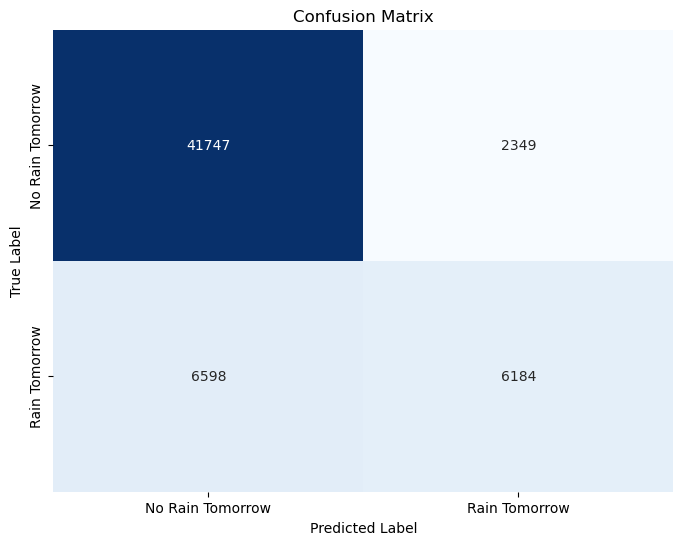

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
classification_report_str = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report_str)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Rain Tomorrow", "Rain Tomorrow"], 
            yticklabels=["No Rain Tomorrow", "Rain Tomorrow"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [44]:
dataframe.to_csv('prediction.csv')